# Simulation by drawing mistake counts


## Set up


In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from src import util
from src import plot

## Simulate

Note: Need to fix the dependent parameter calculations

For each trial it draws a random number of mistakes and then simulates the typing
speed and accuracy for that trial.
The number of mistakes is a Poisson distribution with some mean mistakeLambda
Each mistake is assumed to take a certain amount of time to correct (normal
distribution)
The total amount of time to correct all mistakes reduces the final wpm

Simulates a typing text accuracy and speed
There is an unerlying average wpm and accuracy
Mistakes are generated randomly

For each test, simulate the number of mistakes and the resulting wpm due to mistake
delays
This is a simple simulation: it does not take into account...


In [3]:
# Set rng
np.random.seed(0)
# Run simulation
avg_wpm = 60
avg_acc = 0.95
error_mean = 0.75
error_std = 0.87
wpm, acc, n_mistakes = util.run_simulation_simple(
    avg_wpm=avg_wpm, avg_acc=avg_acc, error_mean=error_mean, error_std=error_std
)

Average WPM: 59.94195550907021
Average Accuracy: 0.9513475373622812


## Plot


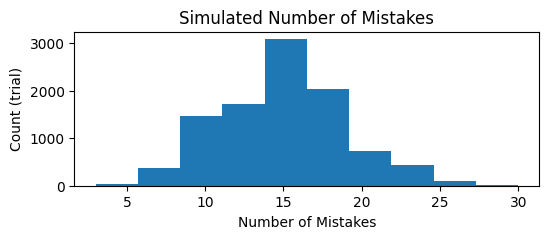

In [4]:
# Plot a histogram of the number of mistakes per trial
fig = plt.figure(figsize=(6, 2))
ax = plot.sim_n_mistakes(n_mistakes)
plt.show()

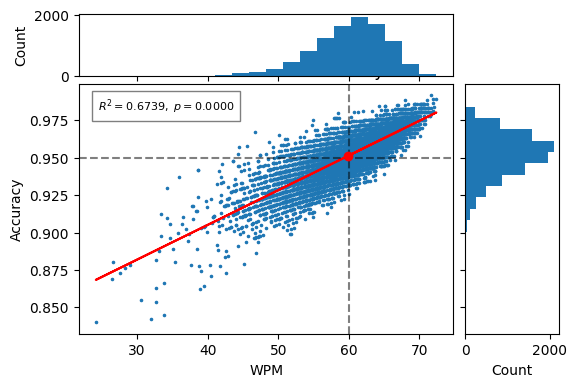

In [5]:
# Plot scatter_hist of wpm and acc
fig = plt.figure(figsize=(6, 4))
ax, ax_histx, ax_histy = plot.sim_scatter_hist(wpm, acc, fig=fig)
ax.axvline(avg_wpm, color="k", linestyle="--", alpha=0.5)
ax.axhline(avg_acc, color="k", linestyle="--", alpha=0.5)
ax.plot(np.mean(wpm), np.mean(acc), "ro")
plt.show()